In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [62]:
# ▶ 1. 이미지 불러오기 (파일 없이)
img = data.camera()  # 흑백 512x512 이미지 (Camera Man)

In [63]:
# ▶ 2. 5x5 가우시안 커널 정의 및 정규화
kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
], dtype=np.float32)
kernel /= 256.0  # 정규화

In [64]:
# ▶ 3. 가우시안 필터 적용
filtered = cv2.filter2D(img, -1, kernel)
# cv2.filter2D(src, ddepth, kernel)
# ddepth = { -1, cv2.CV_32F, cv2.CV_64F, cv2.CV_8U }
# -1은 입력 이미지와 같은 자료형으로, 그 외에는 32,64 float형
# 패딩은 자동으로 적용되어 있음.

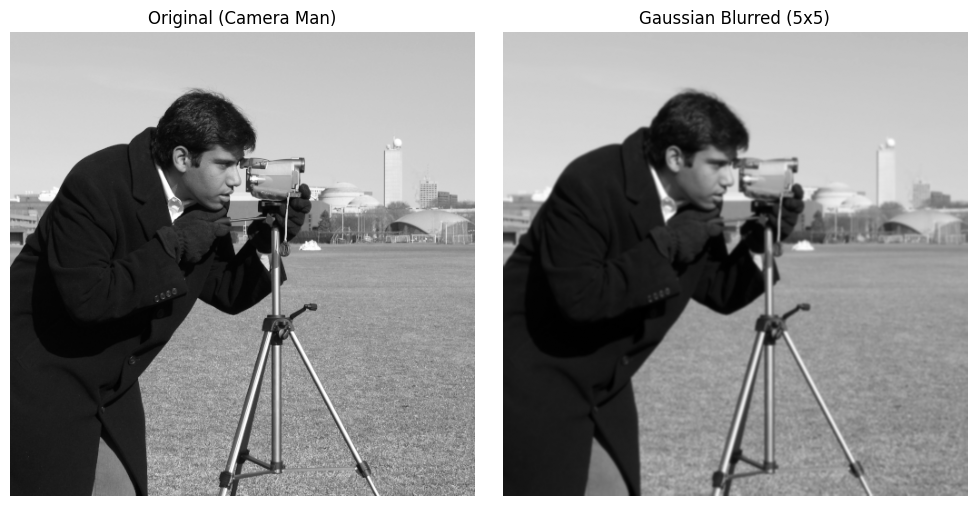

In [65]:
# ▶ 4. 결과 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original (Camera Man)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered, cmap='gray')
plt.title('Gaussian Blurred (5x5)')
plt.axis('off')


plt.tight_layout()
plt.show()

In [66]:
def my_filter2D(image, kernel):
    h, w = image.shape # (512,512)
    kh, kw = kernel.shape #(5,5)
    pad_h = kh // 2 # 2
    pad_w = kw // 2 # 2

    # 1. 이미지 패딩 (제로 패딩)
    # (516,516)
    # 2번째 인자: ((y축 위, y축 아래), (x축 왼, x축 우))
    # 3번째 인자 mode: constant_values에 들어간 값으로 패딩을 채우겠다는 뜻
    # 4번째 인자 constant_values: 0으로 채우겠다
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # 2. 출력 이미지 초기화
    # zero와 차별점이 있다면, zero는 (2,2)처럼 크기를 지정해주어야 하고, zeros_like는 0에 불러온 image의 shape 만큼 0을 채움
    output = np.zeros_like(image, dtype=np.float32)

    # 3. 컨볼루션 연산
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            # 첫 시작은 아래와 같은 형태
            # 0 0 0 0 0
            # 0 0 0 0 0
            # 0 0 1 2 2
            # 0 0 1 2 1
            # 0 0 2 1 2
            # 이 행렬을 커널과 곱한다
            output[i, j] = np.sum(region * kernel) # 아다마르 곱
            # output은 원본 이미지와 같은 크기로 되어 있어서 0,0부터 512,512까지로 되어 있음.

    # 4. 결과값 범위 클리핑 (0~255) 후 정수형으로 변환
    # 픽셀 범위를 넘는 것은 최댓값으로 잘라줌
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output

In [67]:
filtered_custom = my_filter2D(img, kernel)

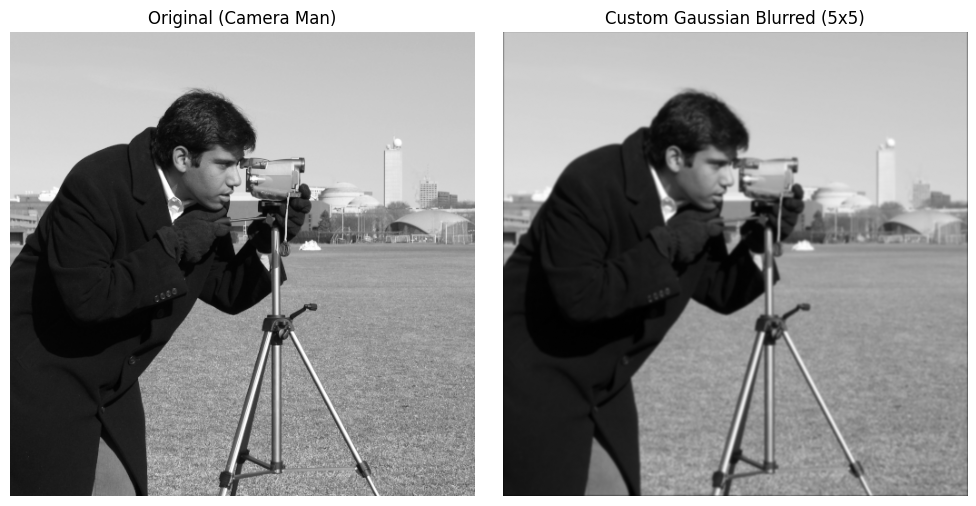

In [68]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original (Camera Man)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_custom, cmap='gray')
plt.title('Custom Gaussian Blurred (5x5)')
plt.axis('off')


plt.tight_layout()
plt.show()